# Metricas de desempeño

En este notebook se ven las métricas usuales para medir el desempeño de un clasificador
El notebook sigue el ejemplo del capítulo 3 del libro "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" que usa la base MNIST de dígitos manuscritos.




## Preámbulo

In [1]:
# En esta celda se definen los modulos que se van a usar en el notebook 

import numpy as np  # paquete matemático para el manejo de arreglos/arrays
import pandas as pd # paquete de manejo de datos en dataframes o series
import matplotlib.pyplot as plt # paquete para realizar gráficos

# Formato general para las figuras 
plt.rc('figure', figsize=(4,4))
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
#%matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas (interactivo)
# %matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
# %matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
#    Si se usa vscode usar también %matplotlib widget en lugar de %matplotlib notebook 
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
# %matplotlib widget
#---------------------------------------------------

### Funciones auxiliares

In [2]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

def plot_100_digits():
    plt.figure(figsize=(9, 9))
    for idx, image_data in enumerate(X[:100]):
        plt.subplot(10, 10, idx + 1)
        plot_digit(image_data)
    plt.subplots_adjust(wspace=0, hspace=0)

## Base MNIST

### Cargar los datos  
[sklearn.datasets.fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml)

In [3]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

### Contenido

In [4]:
print('Data:  (X)', mnist.data.shape)
print('Target (y):', mnist.target.shape)

print('clases:', mnist.categories)

X, y = mnist.data, mnist.target

Data:  (X) (70000, 784)
Target (y): (70000,)
clases: {'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}


### Descripción de los datos

In [5]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### Ver la imagen de un dígito

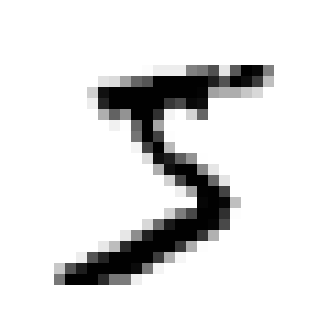

In [6]:

some_digit = X[0]
plot_digit(some_digit)

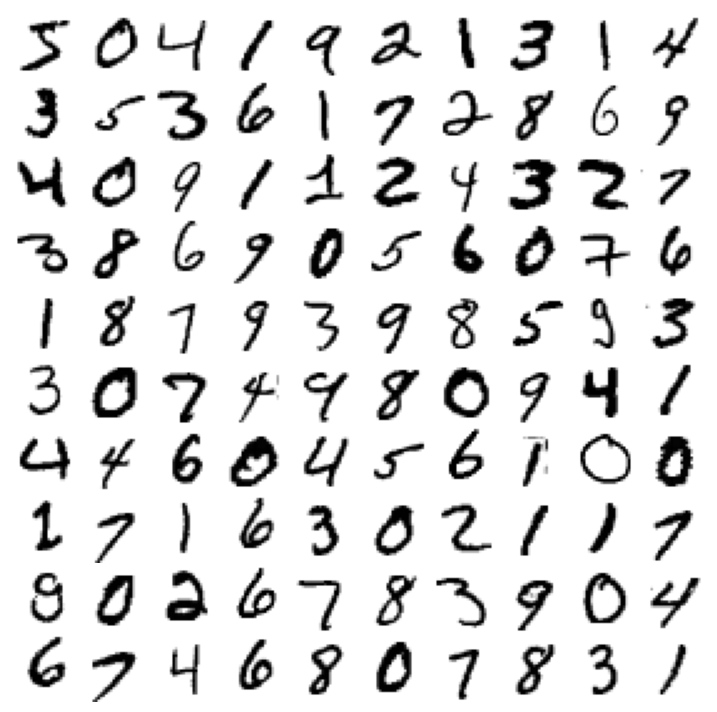

In [7]:
plot_100_digits()

## Partición de los datos

Los primeros 60000 son de entrenamiento y los restantes 10000 son para test

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Están bien repartidas las clases en los sets ?

Text(0.5, 1.0, 'Test')

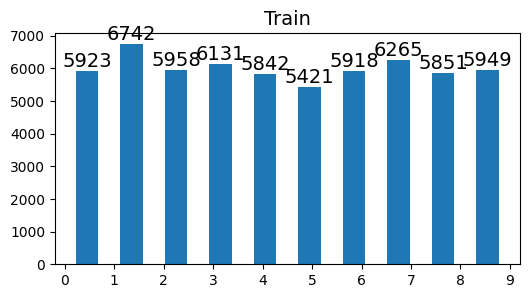

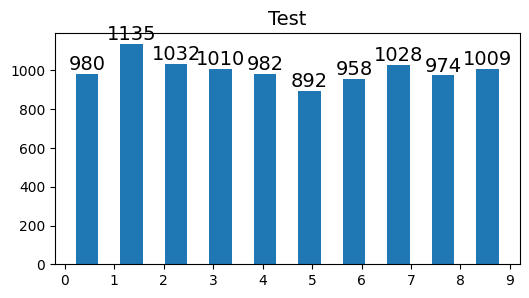

In [9]:
plt.figure(figsize=(6,3))
counts, edges, bars = plt.hist(sorted(y_train), rwidth=0.5)
_ = plt.bar_label(bars)
plt.title('Train')

plt.figure(figsize=(6,3))
counts, edges, bars = plt.hist(sorted(y_test), rwidth=0.5)
_ = plt.bar_label(bars)
plt.title('Test')



## Entrenamiento de un clasificador binario

En lugar de clasificar en los 10 dígitos consideramos, en esta parte, el problema de clasificar si un dígito es o no es un 5.  

Definimos las nuevas etiquetas como "True" si es el dígito es un 5 o "False" si es cualquier otro dígito


In [10]:
y_train_5 = (y_train == '5')  
y_test_5 = (y_test == '5')

### Entrenamos un clasificador SGDClassifier
[sklearn.linear_model.SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  

Ver que modelo lineal y que penalización se está usando en el caso de la celda siguiente. 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

### Predecir un caso

Es un cinco ?  Resultado esperado: False, Predicción: [False]


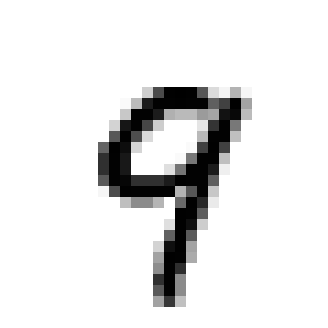

In [12]:
index = 12  # cambiar para probar otros casos
some_digit = X_test[index]

# resultado esperado
target = y_test_5[index]
#prediccion
prediction = sgd_clf.predict([some_digit])

print(f'Es un cinco ?  Resultado esperado: {target}, Predicción: {prediction}')
plot_digit(some_digit)


## Metricas de performance

### Cálculo de accuracy mediante Cross-Validation
[sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [13]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

### Qué pasa si definimos un clasificador "tonto" 
**Predecimos que ninguna instancia es un cinco**  

Para implementar el clasificador "tonto" usamos [sklearn.dummy.DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) que va a clasificar según la clase más probable. Como hay más instancias que no son un cinco (etiqueta **False**), va a predecir toda instancia como **False**.





In [14]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_5)


DummyClassifier()

### Cómo se desempeña el clasificador "tonto" ?

In [15]:
cross_val_score(dummy_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

### Nada mal !!!

**Preguntas**: 
* Por qué da "tan bien" el desempeño del clasificador "tonto" ?
* Qué se puede decir de la métrica de accuracy o exactitud ?

Respuesta:



## Confusion Matrix

[sklearn.model_selection.cross_val_predict](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html#sklearn.model_selection.cross_val_predict)  

[sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn-metrics-confusion-matrix)

[sklearn.metrics.ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)


[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)


In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### Display texto

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)

[[53892   687]
 [ 1891  3530]]


### Display gráfico

Text(0.5, 1.0, 'Confusion Matrix')

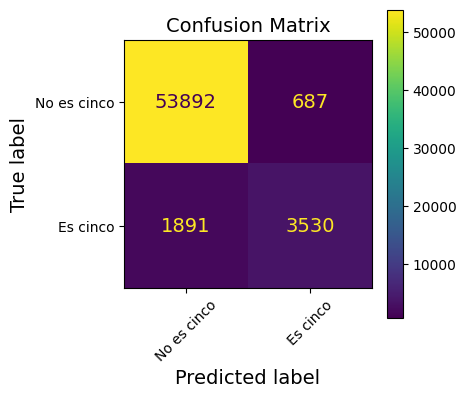

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train_5, y_train_pred,
                                        display_labels=['No es cinco', 'Es cinco'],
                                        xticks_rotation=45)
plt.title('Confusion Matrix')


## Precision and Recall

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)  # == 3530 / (687 + 3530)

0.8370879772350012

In [21]:
#  precision: TP / (FP + TP)
cm[1, 1] / (cm[0, 1] + cm[1, 1])

0.8370879772350012

In [22]:
recall_score(y_train_5, y_train_pred)  # == 3530 / (1891 + 3530)

0.6511713705958311

In [23]:
# recall: TP / (FN + TP)
cm[1, 1] / (cm[1, 0] + cm[1, 1])

0.6511713705958311

In [24]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343847

In [25]:
# extra code – this cell also computes the f1 score
cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2)

0.7325171197343847

## Compromiso Precision/Recall 

En un clasificador lineal como el implementado la frontera de decisión es lineal. Es un hiperplano que divide, de la mejor manera posible, las muestras en el espacio de características. 

Para cada muestra, la distancia con signo al hiperplano, da una medida de la confianza con que la podemos clasificar.
* Una muestra con distancia positiva grande será con buena confianza positiva
* Una muestra con distancia negativa grande será con buena confianza negativa
* Muestras cercanas al hiperplano serán más dudosas

Podemos obtener scores de confianza proporcionales a la distancia al hiperplano mediante la función [SGDClassifier.decision_function](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier.decision_function)

Tomando distintos umbrales sobre esos scores de confianza podemos variar la clasificación y decidir tener una mejor precisión o un mejor recall. 

---
Nota: La misma idea de distancia a la frontera de decisión como un score de confianza aplica en general a otros clasificadores lineales o no lineales.

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-5035.14077419])

In [27]:
y_scores = sgd_clf.decision_function(X_train)
print(y_scores.min(), y_scores.max())

-62986.457136452096 18841.375080797483


### Algunas instancias con scores negativos y positivos

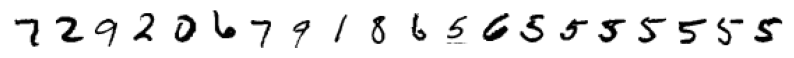

In [28]:
sample_scores = np.linspace(-15000, 15000,20) 

plt.figure(figsize=(10, 2))
for i, sample_score in enumerate(sample_scores):
    idx = np.argmin(np.abs(y_scores-sample_score))
    
    image_data = X_train[idx]
    plt.subplot(1, len(sample_scores), i + 1)
    
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)

In [29]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

### Curvas precision/recall vs umbral de decisión

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

threshold = 3000

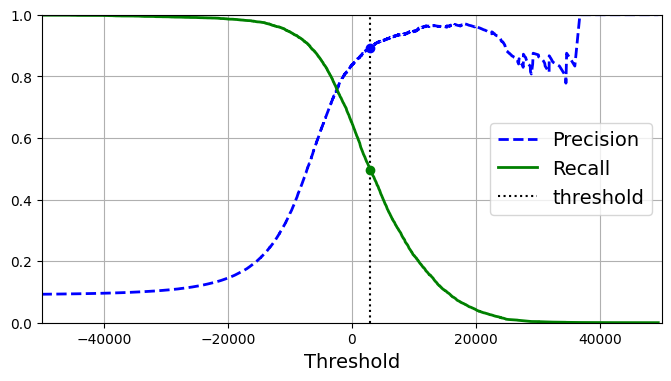

In [31]:
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")


### Curva Precision vs Recall

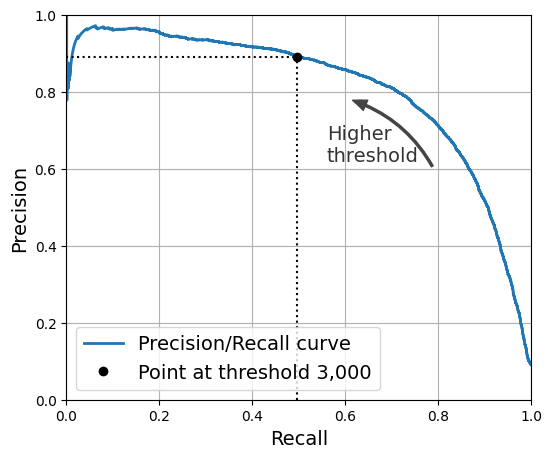

In [32]:
import matplotlib.patches as patches  # extra code – for the curved arrow

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")

# extra code – just beautifies and saves Figure 3–6
plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0.0, recalls[idx]], [precisions[idx], precisions[idx]], "k:")
plt.plot([recalls[idx]], [precisions[idx]], "ko",
         label="Point at threshold 3,000")
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.2",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


plt.show()

### Precision del 90%

In [33]:
idx_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[idx_for_90_precision]
threshold_for_90_precision

3370.0194991439557

In [34]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [35]:
recall_at_90_precision = recall_score(y_train_5, y_train_pred_90)
recall_at_90_precision

0.4799852425751706

### Curva ROC

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

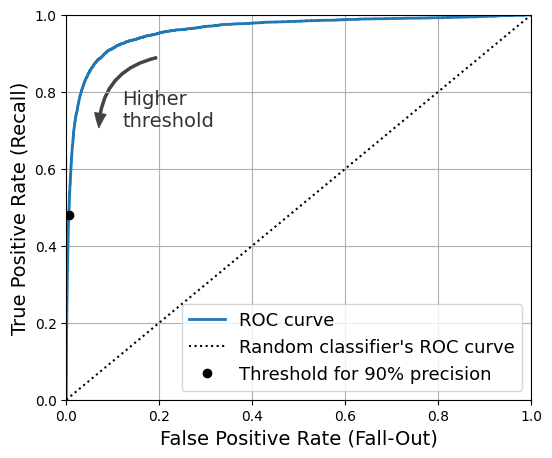

In [37]:
idx_for_threshold_at_90 = (thresholds <= threshold_for_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)


plt.show()

## PR-AUC  Area bajo la curva P vs R

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

### El PR-AUC permite comparar clasificadores

In [39]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [40]:
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [41]:
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(
    y_train_5, y_scores_forest)

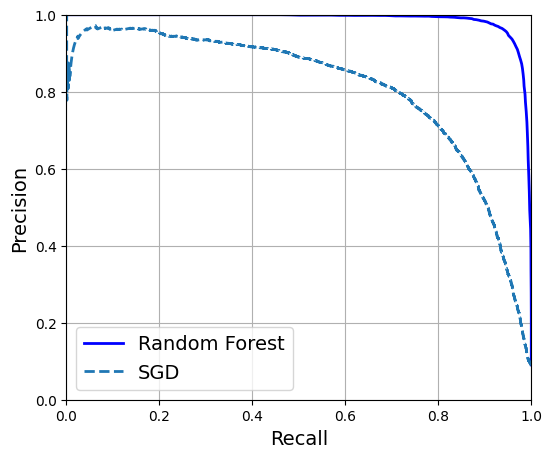

In [42]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")


In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# Clasificacion multiclase

In [44]:
sgd_clf = SGDClassifier()


Esta celda siguiente demora unos minutos

In [45]:
from sklearn.preprocessing import StandardScaler

# Para que tarde algo menos
X_train_reducido = X_train[:2000]
y_train_reducido = y_train[:2000]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reducido.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train_reducido, cv=3, scoring="accuracy")

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train_reducido, cv=3)

## Reporte de resultados

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_train_reducido, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       191
           1       0.93      0.89      0.91       220
           2       0.81      0.85      0.83       198
           3       0.86      0.81      0.83       191
           4       0.81      0.86      0.83       214
           5       0.77      0.74      0.75       180
           6       0.94      0.91      0.92       200
           7       0.87      0.87      0.87       224
           8       0.76      0.78      0.77       172
           9       0.77      0.81      0.79       210

    accuracy                           0.84      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.84      0.85      2000



## Matrices de confusión

In [62]:
plt.rc('figure', figsize=(8,8))

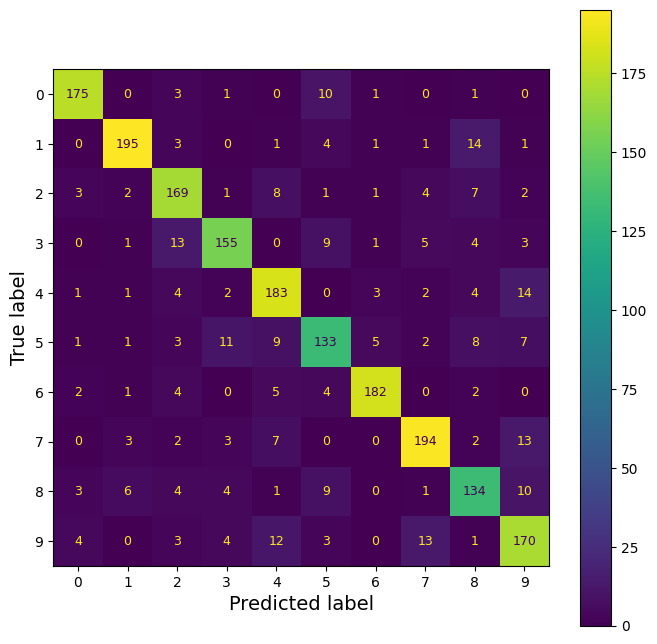

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay


plt.rc('font', size=9)  # extra code – make the text smaller
ConfusionMatrixDisplay.from_predictions(y_train_reducido, y_train_pred)


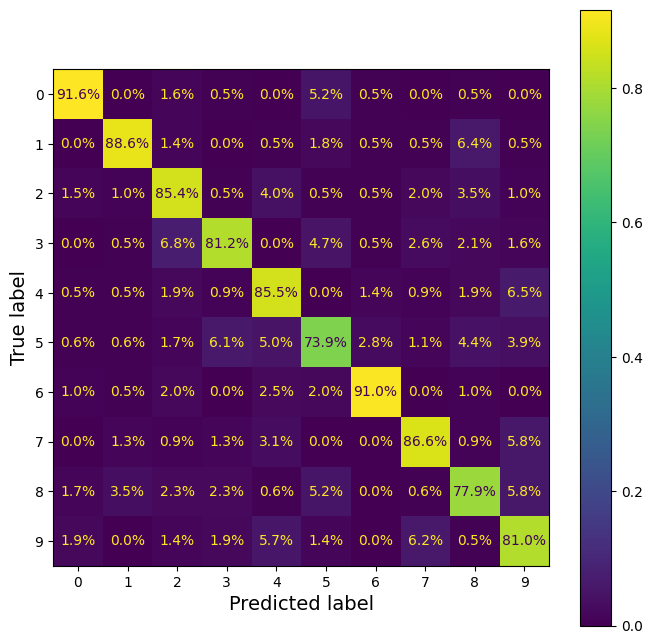

In [64]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train_reducido, y_train_pred,
                                        normalize="true", values_format=".01%")


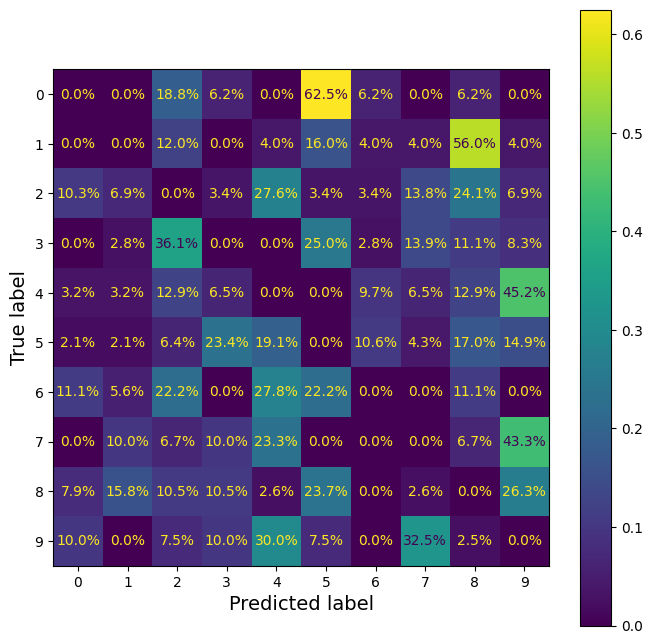

In [65]:
sample_weight = (y_train_pred != y_train_reducido)
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train_reducido, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".01%")
